In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')

In [1]:
# df

In [4]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

# viz

<IPython.core.display.Javascript object>


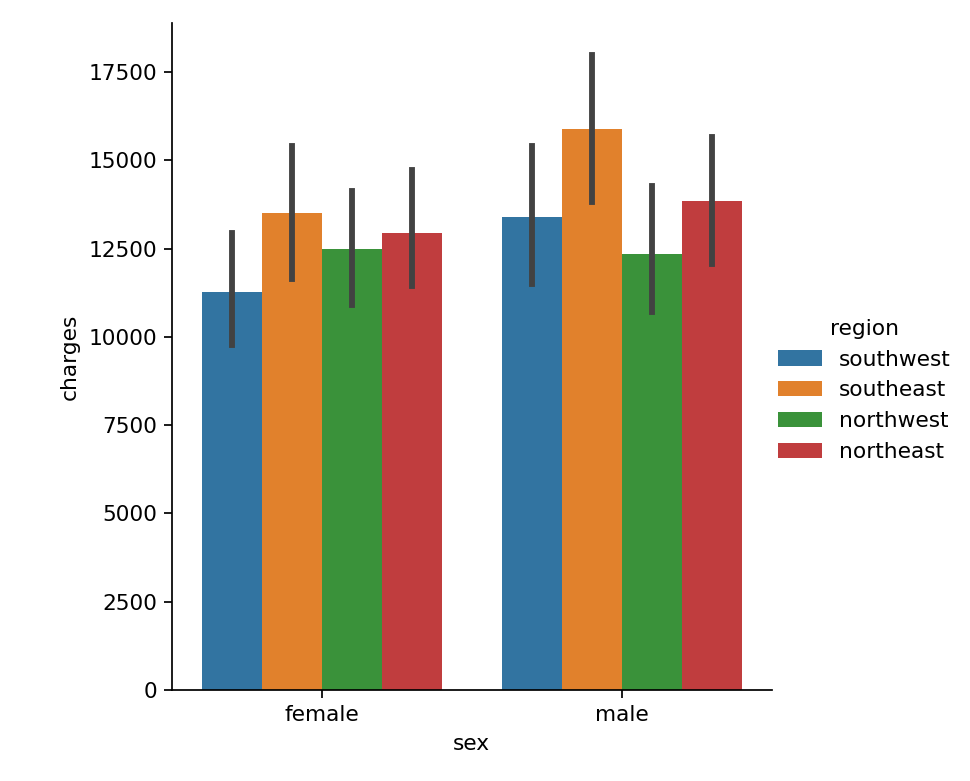

In [5]:
sns.catplot(x = 'sex',y= 'charges', data = df, kind ='bar', hue ='region')

<IPython.core.display.Javascript object>


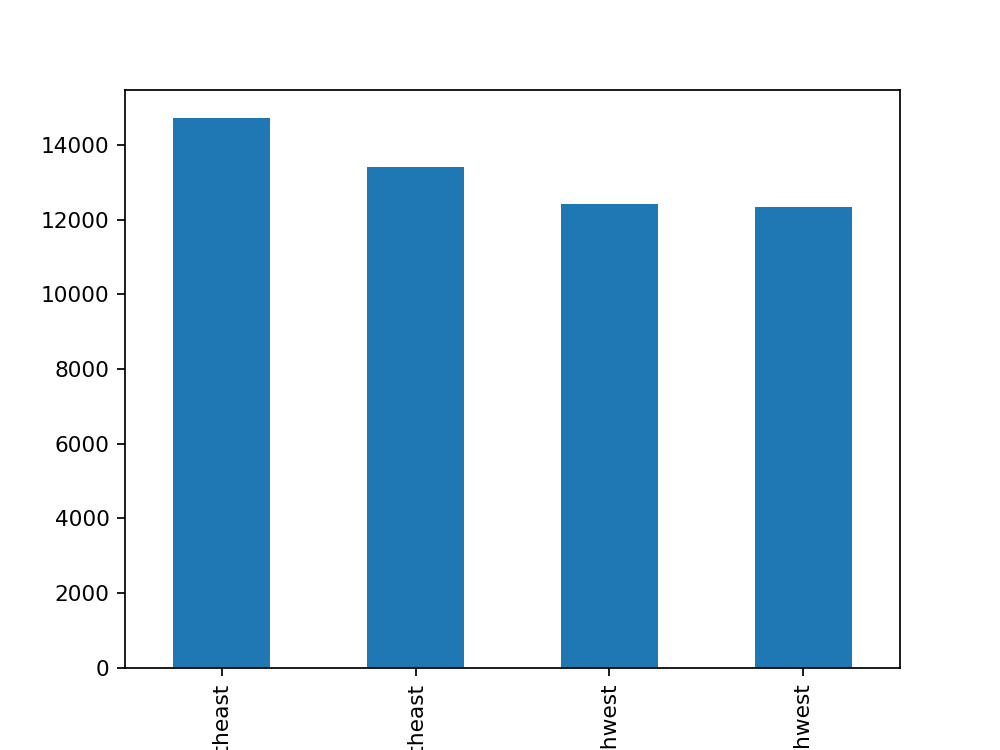

In [6]:
plt.figure()
df.groupby('region')['charges'].mean().sort_values(ascending = False).plot(kind ='bar')

<IPython.core.display.Javascript object>


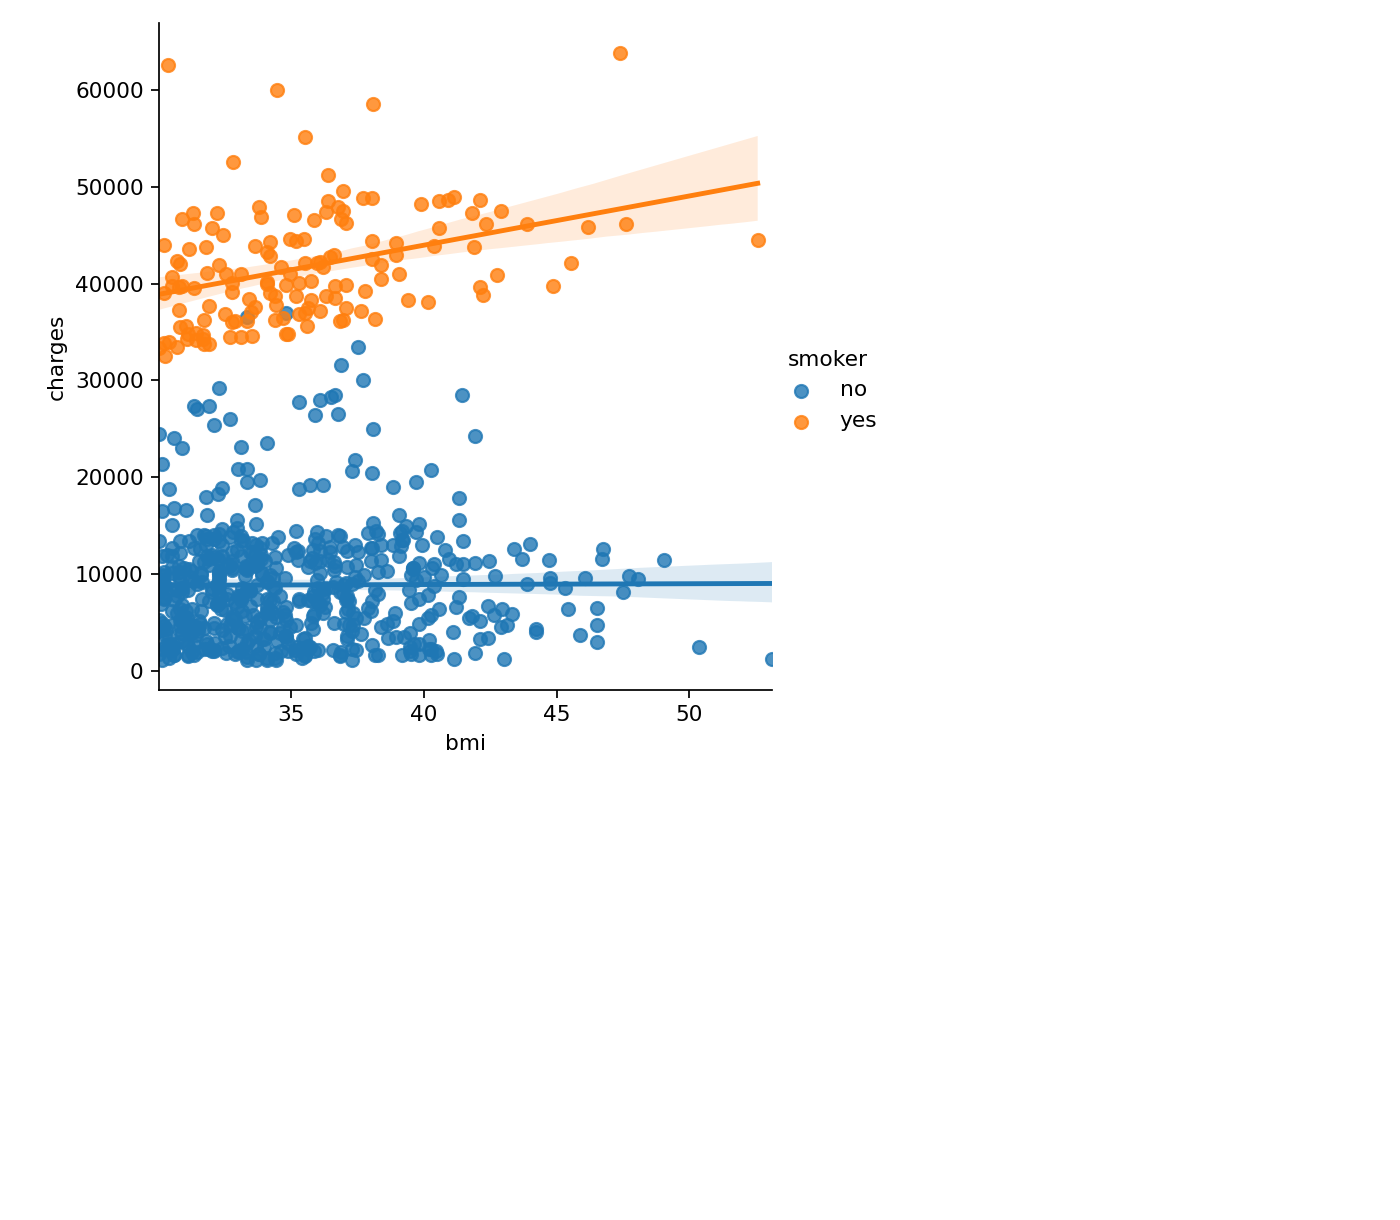

In [7]:
sns.lmplot(x= 'bmi', y= 'charges', data = df[df.bmi>30], hue ='smoker')

# hypth test

In [8]:
female = df.loc[df['sex']=='female', 'charges']
male = df.loc[df['sex']=='male', 'charges']

In [9]:
from scipy.stats import ttest_ind

In [10]:
ttest_ind (male,female, equal_var =False)

Ttest_indResult(statistic=2.1008878232359565, pvalue=0.035841014956016645)

In [11]:
n_females = df['sex'].value_counts()[1]
n_males = df['sex'].value_counts()[0]

In [12]:
df.loc[df['sex']=='male'].smoker.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [13]:
df.loc[df['sex']=='female'].smoker.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [14]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([115, 159] , [n_females, n_males])

(-2.7867402154855503, 0.005324114164320532)

In [15]:
Q3= df.age.quantile(.75)
Q1 = df.age.quantile(.25)
IQR =Q3 -Q1

<IPython.core.display.Javascript object>


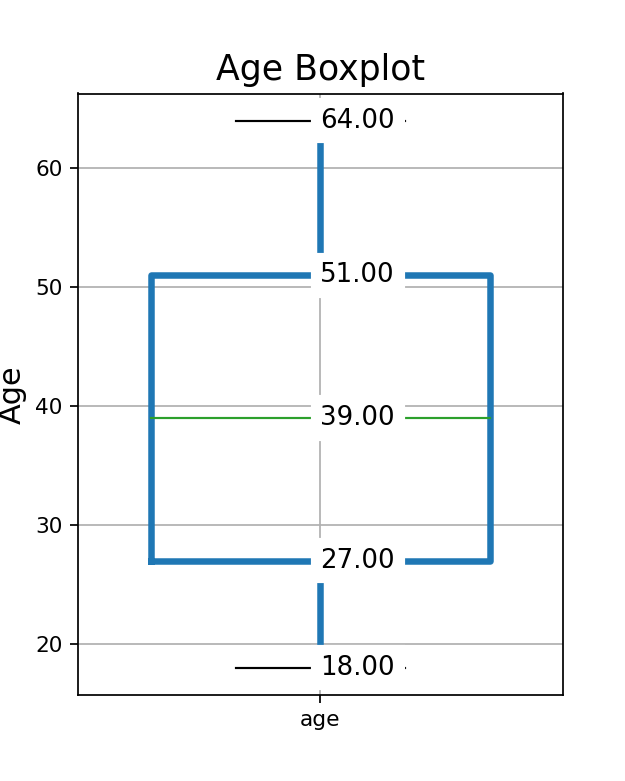

Mean Age = 39.20702541106129
Median Age = 39.0
Total number of outliers in age distribution: 0.


In [16]:
from custom_box import box_plot
box_plot('age')

In [17]:
upper =Q3 + 1.5 * IQR 
lower =Q1-1.5*IQR

In [18]:
df[(df.age<lower) | (df.age>upper)]

,age,sex,bmi,children,smoker,region,charges


In [19]:
def outlier (x='age'):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df2 =df[(df[x]<lower) | (df[x]>upper)]
    print('no. of outliers:',len(df2))
    return df2

In [20]:
outlier('charges')

no. of outliers: 139


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


# corr

In [21]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<IPython.core.display.Javascript object>


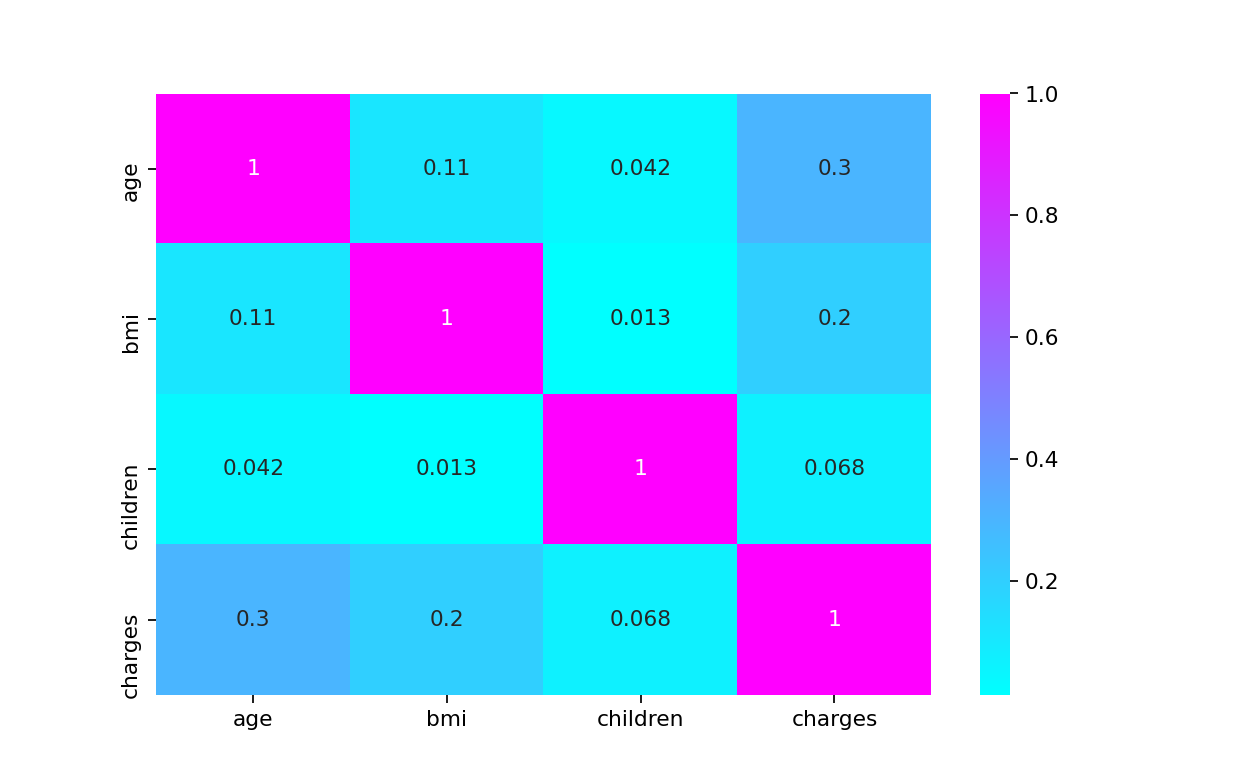

In [22]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [23]:
import numpy as np
def corr_plot(data,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (6, 5), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Correlations (Pearson)', size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'viridis', annot = True)
    plt.show()

<IPython.core.display.Javascript object>


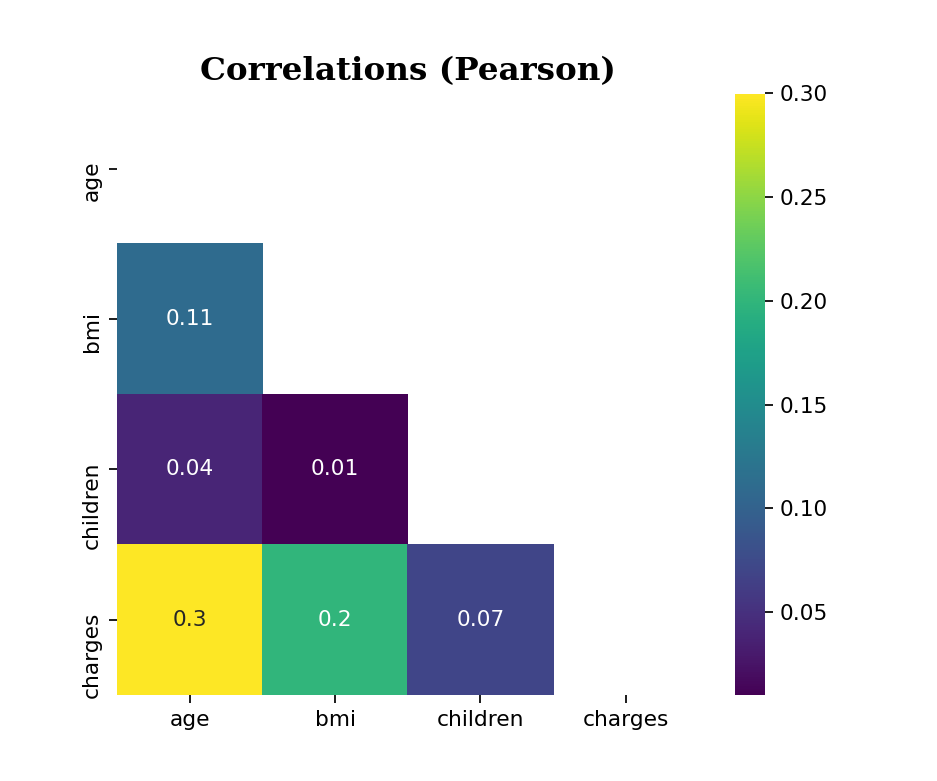

In [24]:
corr_plot(df)

In [25]:
def obese_smoker(bmi,smoker):
    if (bmi>=30)& (smoker=="yes"):
        return "fat_smoker"
    else:
        return "normal" 

df["fit_fat"]=df[["bmi","smoker"]].apply(lambda x: obese_smoker(x["bmi"],x["smoker"]),axis=1)
df

,age,sex,bmi,children,smoker,region,charges,fit_fat
0,19,female,27.900,0,yes,southwest,16884.92400,normal
1,18,male,33.770,1,no,southeast,1725.55230,normal
2,28,male,33.000,3,no,southeast,4449.46200,normal
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,normal
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,normal
1334,18,female,31.920,0,no,northeast,2205.98080,normal
1335,18,female,36.850,0,no,southeast,1629.83350,normal
1336,21,female,25.800,0,no,southwest,2007.94500,normal


In [26]:
df.drop('region', inplace = True,axis =1)

In [27]:
df2 = pd.get_dummies(df, drop_first=True)

<IPython.core.display.Javascript object>


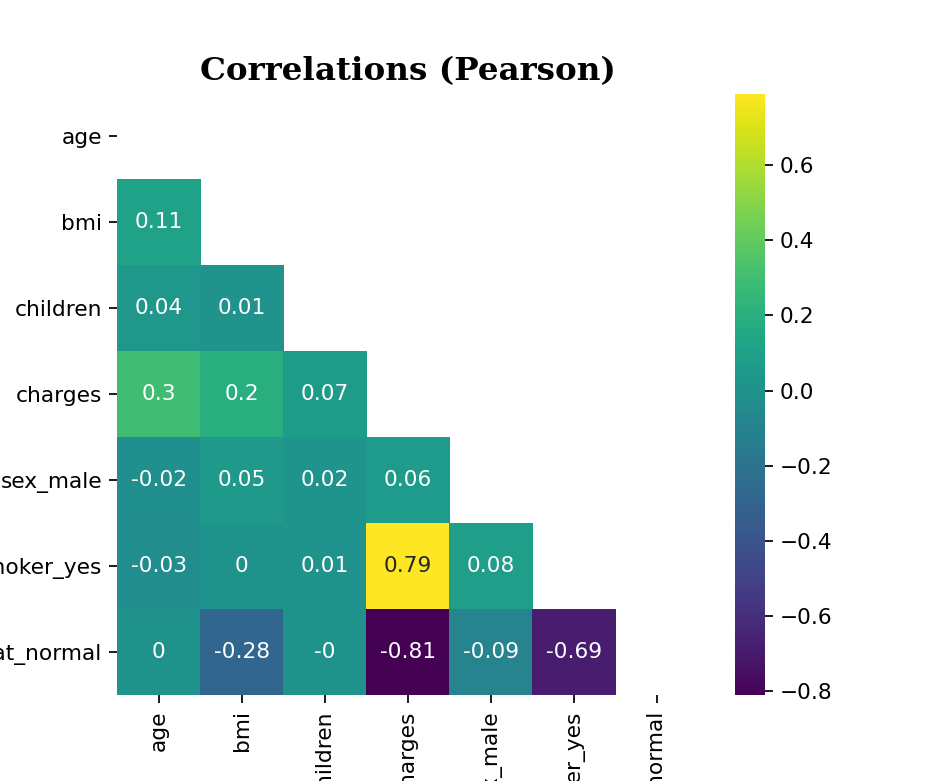

In [28]:
corr_plot(df2)

In [29]:
df2.corr()['charges']

age               0.299008
bmi               0.198341
children          0.067998
charges           1.000000
sex_male          0.057292
smoker_yes        0.787251
fit_fat_normal   -0.814661
Name: charges, dtype: float64

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def viff (dff):
    
    vif = pd.DataFrame()
    vif['fe'] = dff.columns
    vif['score']= [variance_inflation_factor(dff.values, i) for i in range (dff.shape[1])]
    return vif

viff(df2)

,fe,score
0,age,14.846577
1,bmi,15.931122
2,children,1.864193
3,charges,13.855784
4,sex_male,2.012743
5,smoker_yes,4.300474
6,fit_fat_normal,14.940824


In [31]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
df=df.drop(['region'],axis=1)
import numpy as np
df=pd.get_dummies(df, drop_first=True)

skf = df.skew()
skf = skf[abs(skf)>.75].index
df[skf]=np.log1p(df[skf])

In [32]:
X= df.drop('charges', axis= 1)

y = df.charges
X

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0.000000,0,0.693147
1,18,33.770,0.693147,1,0.000000
2,28,33.000,1.386294,1,0.000000
3,33,22.705,0.000000,1,0.000000
4,32,28.880,0.000000,1,0.000000
...,...,...,...,...,...
1333,50,30.970,1.386294,1,0.000000
1334,18,31.920,0.000000,0,0.000000
1335,18,36.850,0.000000,0,0.000000
1336,21,25.800,0.000000,0,0.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)


In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X2,y)

y_hat=lr.predict(X2)

lr.score(X2,y)

0.7646901310452301

In [35]:
from sklearn.metrics import r2_score , mean_absolute_error,  mean_squared_error

print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 0.19874889934025822
RMSE: 0.4458126280627975
MAE: 0.2829058250221374
R2 Score: 0.7646901310452301


In [36]:
lr.coef_

array([ 1.59381102,  0.40317045,  0.40310788, -0.07475143,  1.54819905])

In [37]:
list(zip (lr.coef_.round(), X.columns))


[(2.0, 'age'),
 (0.0, 'bmi'),
 (0.0, 'children'),
 (-0.0, 'sex_male'),
 (2.0, 'smoker_yes')]

In [38]:

pd.DataFrame(list (zip(lr.coef_.round(), X.columns)), 
             columns = ['coef', 'feature']).sort_values('coef',ascending= False)

,coef,feature
0,2.0,age
4,2.0,smoker_yes
1,0.0,bmi
2,0.0,children
3,-0.0,sex_male


In [39]:
y[:5]

0    9.734236
1    7.453882
2    8.400763
3    9.998137
4    8.260455
Name: charges, dtype: float64

In [40]:
y_hat[:5]

array([9.50675903, 8.0687738 , 8.56284594, 8.31253305, 8.34486312])

In [41]:
pd.DataFrame({'Actual': y, 'Predicted': y_hat})

,Actual,Predicted
0,9.734236,9.506759
1,7.453882,8.068774
2,8.400763,8.562846
3,9.998137,8.312533
4,8.260455,8.344863
...,...,...
1333,9.268755,9.303085
1334,7.699381,7.967515
1335,7.396847,8.020990
1336,7.605365,8.005078


In [42]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
df=df.drop(['region'],axis=1)
df = df.drop (index= [3, 62, 140, 219, 468, 583, 661, 688, 1008, 1027, 1142, 1328]).reset_index()
def obese_smoker(bmi,smoker):
    if (bmi>=30)& (smoker=="yes"):
        return "fat_smoker"
    else:
        return "normal" 

df["fit_fat"]=df[["bmi","smoker"]].apply(lambda x: obese_smoker(x["bmi"],x["smoker"]),axis=1)

df=pd.get_dummies(df, drop_first=True)

X= df.drop('charges', axis= 1)
y = df.charges

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X2,y)

y_hat=lr.predict(X2)

lr.score(X2,y)

0.8793498614132589

In [44]:
pd.DataFrame({'Actual': y, 'Predicted': y_hat})

,Actual,Predicted
0,16884.9240,16049.672781
1,1725.5523,2355.035685
2,4449.4620,6000.976963
3,3866.8552,5128.942748
4,3756.6216,5075.813846
...,...,...
1321,10600.5483,12025.370441
1322,2205.9808,2504.710860
1323,1629.8335,2926.134149
1324,2007.9450,2779.255462


<IPython.core.display.Javascript object>


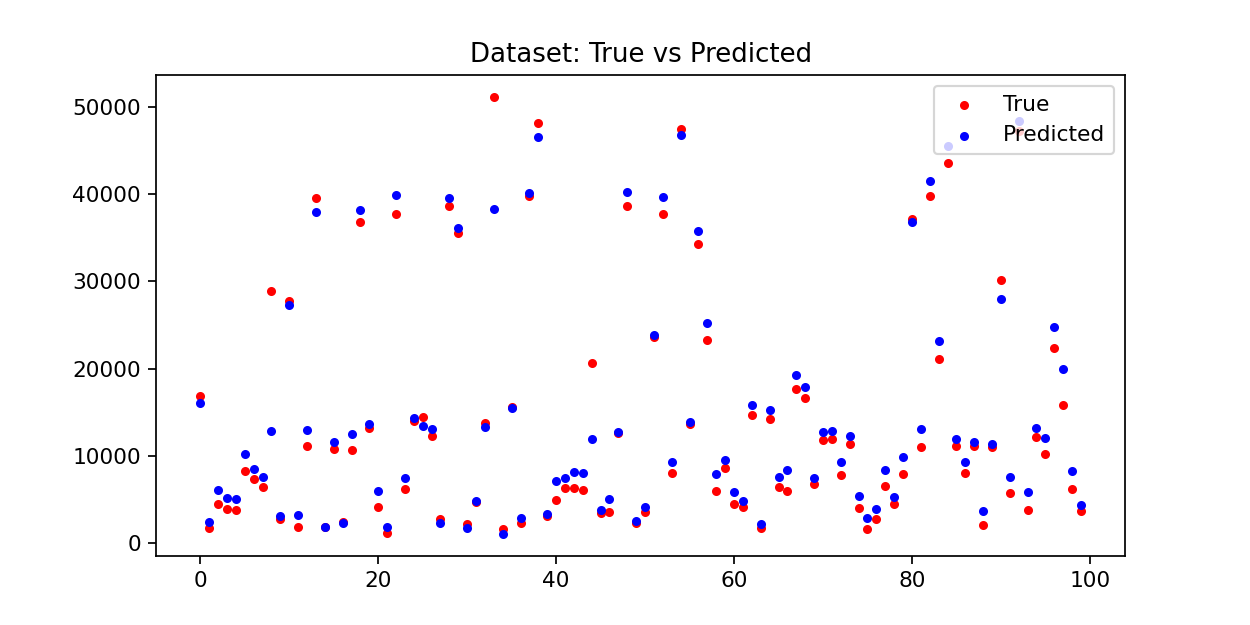

In [45]:

def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()
PlotPrediction(y[:100],y_hat[:100])


In [46]:
df

,index,age,bmi,children,charges,sex_male,smoker_yes,fit_fat_normal
0,0,19,27.90,0,16884.9240,0,1,1
1,1,18,33.77,1,1725.5523,1,0,1
2,2,28,33.00,3,4449.4620,1,0,1
3,4,32,28.88,0,3866.8552,1,0,1
4,5,31,25.74,0,3756.6216,0,0,1
...,...,...,...,...,...,...,...,...
1321,1333,50,30.97,3,10600.5483,1,0,1
1322,1334,18,31.92,0,2205.9808,0,0,1
1323,1335,18,36.85,0,1629.8335,0,0,1
1324,1336,21,25.80,0,2007.9450,0,0,1


In [47]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
df.loc[(df.smoker=='no') & (df.bmi<=25)].charges.quantile(.92)


14175.027283200001

In [48]:
df.loc[(df.smoker=='no') & (df.bmi<=25)& (df.charges>15000)].index



Int64Index([3, 62, 140, 219, 468, 583, 661, 688, 1008, 1027, 1142, 1328], dtype='int64')

In [49]:
df = df.drop (index= [3, 62, 140, 219, 468, 583, 661, 688, 1008, 1027, 1142, 1328]).reset_index()

In [50]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,1,18,male,33.77,1,no,southeast,1725.5523
2,2,28,male,33.00,3,no,southeast,4449.4620
3,4,32,male,28.88,0,no,northwest,3866.8552
4,5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...,...
1321,1333,50,male,30.97,3,no,northwest,10600.5483
1322,1334,18,female,31.92,0,no,northeast,2205.9808
1323,1335,18,female,36.85,0,no,southeast,1629.8335
1324,1336,21,female,25.80,0,no,southwest,2007.9450


# test_train

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13340)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
# we must apply the scaling to the test set that we computed for the training set
x_test_scaled = scaler.transform(x_test)

In [52]:
linreg = LinearRegression().fit(x_train_scaled,y_train)
y_hat=linreg.predict(x_train_scaled)

print(linreg.score(x_train_scaled,y_train))
print('test:',linreg.score(x_test_scaled,y_test))

0.8751827061569403
test: 0.8950741200972212


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def metrics(true,predicted,message = "Train set"):
    MSE = mean_squared_error(true,predicted)
    MAE = mean_absolute_error(true,predicted)
    RMSE= np.sqrt(mean_squared_error(true,predicted))
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)
metrics(y_train,y_hat)  

Train set
MSE: 18309098.16951856
MAE: 2309.2334207208432
RMSE: 4278.913199577501
LogRMSE: 0.3859935506764114


<IPython.core.display.Javascript object>


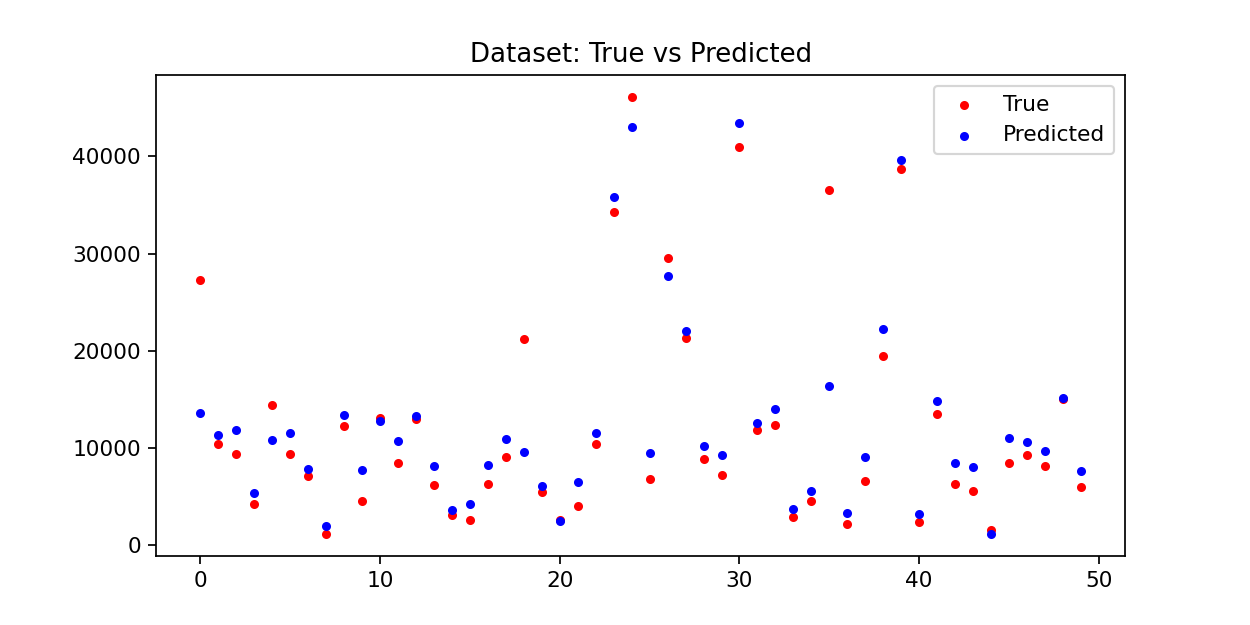

In [54]:
PlotPrediction(y_train[:50],y_hat[:50])


In [55]:
from sklearn.linear_model import Ridge,Lasso
rg =Ridge(alpha =1)
rg.fit(x_train_scaled, y_train)
rg.score(x_train_scaled, y_train)

0.8751499977328515

In [56]:
rg.score(x_test_scaled, y_test)

0.8949506694667513

<IPython.core.display.Javascript object>


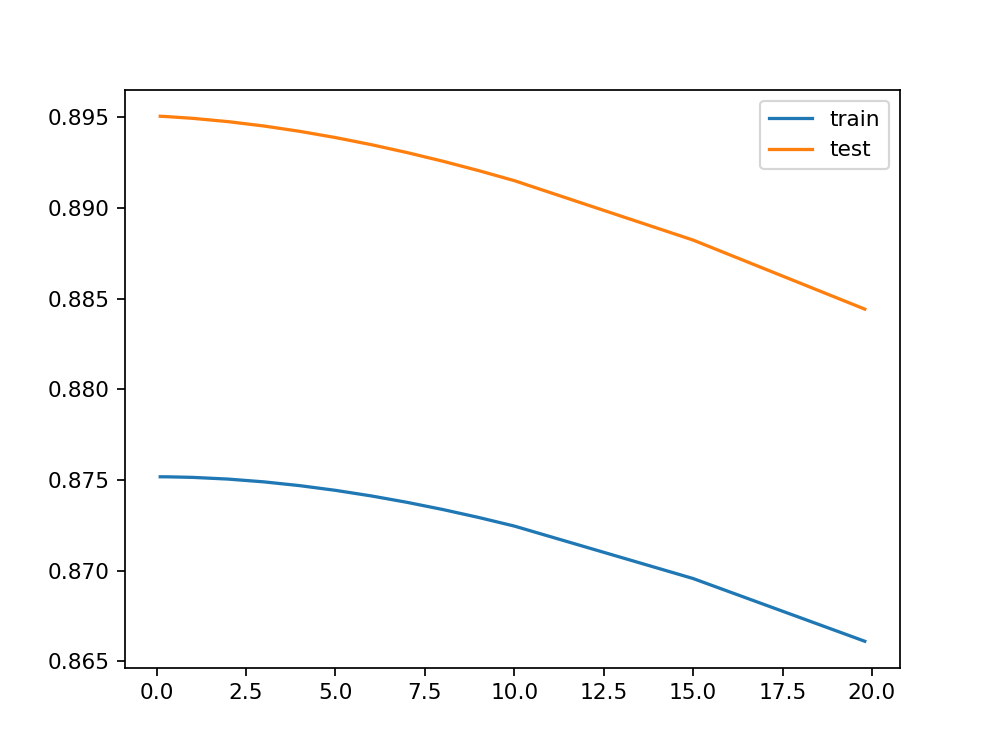

In [57]:
alp = [0.1, 0.3, 1,2, 3,4, 5,6,7,8,9, 10, 15,19.8]
score = []
score2 =[]
for i in alp:
    model = Ridge(alpha =i)
    model.fit(x_train_scaled, y_train)
    score.append(model.score(x_train_scaled, y_train))
    score2.append(model.score(x_test_scaled, y_test))    
plt.figure()
plt.plot(alp, score)

plt.plot(alp, score2)
plt.legend(['train', 'test'])

<IPython.core.display.Javascript object>


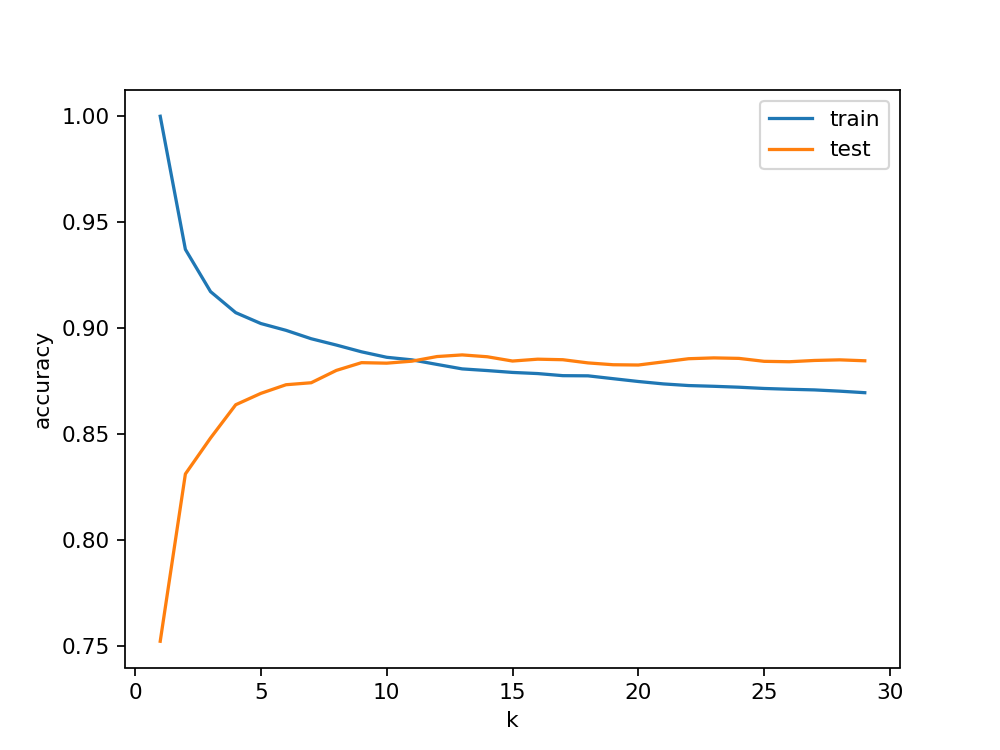

In [58]:
from sklearn.neighbors import KNeighborsRegressor
k_range = range(1,30)
scores1 = []
scores2 = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train_scaled, y_train)
    scores1.append(knn.score(x_train_scaled, y_train))
    scores2.append(knn.score(x_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, scores1)
plt.plot(k_range, scores2)
plt.legend(['train', 'test'])

# cross_valid

In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rg,X2,y, cv= 5,scoring='r2')
print('scores:',cv_scores)

scores: [0.92059343 0.79897292 0.90351915 0.86586953 0.88649055]


In [60]:
cv_scores.mean()

0.8750891152239048

In [85]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

RFR = RandomForestRegressor(n_estimators = 1000,max_depth=3)
RFR.fit(x_train_scaled,y_train)

print('train_score:',RFR.score(x_train_scaled,y_train))
print('testt_score:',RFR.score(x_test_scaled,y_test))

train_score: 0.8657686375634799
testt_score: 0.8790955147583045


In [62]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
scale=RobustScaler().fit(X)
X1=scale.transform(X)

kfolds=KFold(n_splits=5,shuffle=True,random_state=42)

model=GradientBoostingRegressor()
gb_param_grid = {"n_estimators":[200,500,1000,2000],
                 "learning_rate":[1,.1,0.01],
                   "max_depth":[2,3,4,5]}

                   
                   
                   
grid_search= GridSearchCV(model,param_grid=gb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
gb_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


4239.423467609571

In [86]:
gb_best

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=1000)

In [88]:



kfolds=KFold(n_splits=10,shuffle=True,random_state=42)



model=Ridge()
rid_param_grid = {"alpha":[0.1, 0.3, 1,2, 3,4, 5,6,7,8,9, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)

grid_search.fit(X1,y)

rid_best=grid_search.best_estimator_
print(rid_best)

print(np.sqrt(-grid_search.best_score_))

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Ridge(alpha=0.3)
4230.16040358004


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.0s finished


In [90]:

from sklearn.linear_model import Lasso
model=Lasso()
las_param_grid = {"alpha":[3,2,1.5,1,.03, 0.001,.005 ,0.0005,0.00052]}
grid_search= GridSearchCV(model,param_grid=las_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
las_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(las_best)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
4230.193530528708
Lasso(alpha=0.03)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


In [91]:
model = KNeighborsRegressor()
rid_param_grid = {"n_neighbors":[1, 3, 5, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
knn_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(knn_best)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.1s remaining:    0.0s


4503.2813116082725
KNeighborsRegressor(n_neighbors=15)


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [92]:
models = [] 
models.append(('ln', LinearRegression())) 
models.append(('ridge', Ridge(alpha = 1))) 
models.append(('lasso', Lasso(alpha=.005))) 
models.append(('kn', KNeighborsRegressor(n_neighbors=5))) 
models.append(('gb',GradientBoostingRegressor(n_estimators = 1000,max_depth=2, learning_rate=.01)))

n_folds = 10
results =[] 
names = []  
for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X1)
    rmse= np.sqrt(-cross_val_score(model, X2, y, scoring="neg_mean_squared_error", cv = kf))
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)
    results.append(rmse) 
    names.append(name)

ln: 4161.586099 (788.506511)
ridge: 4162.620589 (784.803144)
lasso: 4161.586270 (788.504890)
kn: 4494.565075 (667.436835)
gb: 4272.525938 (761.353624)


<IPython.core.display.Javascript object>


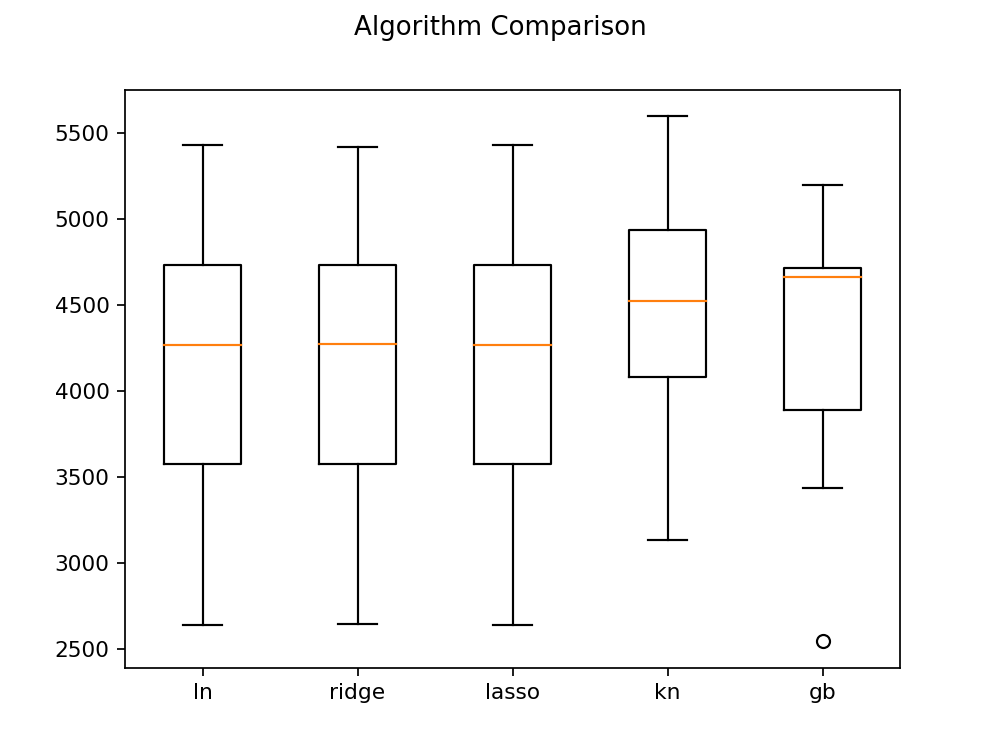

In [93]:

fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [76]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(rid_best, las_best,knn_best,gb_best),
                                meta_regressor=gb_best,n_jobs=-1,
                                use_features_in_secondary=True)
stack_gen.fit(np.array(X1), np.array(y))
y_hat=stack_gen.predict(X1)

In [94]:
np.sqrt(mean_squared_error(y,stack_gen.predict(X1)))

3826.026236266466

In [95]:
def blend_models_predict(X):
    return ((0.1 * las_best.predict(X)) + \
            (0.3 * rid_best.predict(X)) + \
            (0.4 * stack_gen.predict(X)) + \
            (0.1 * lr.predict(X)) + \
            (0.1 * gb_best.predict(X)))

np.sqrt(mean_squared_error(y,blend_models_predict(X1)))

4178.790031818922

<IPython.core.display.Javascript object>


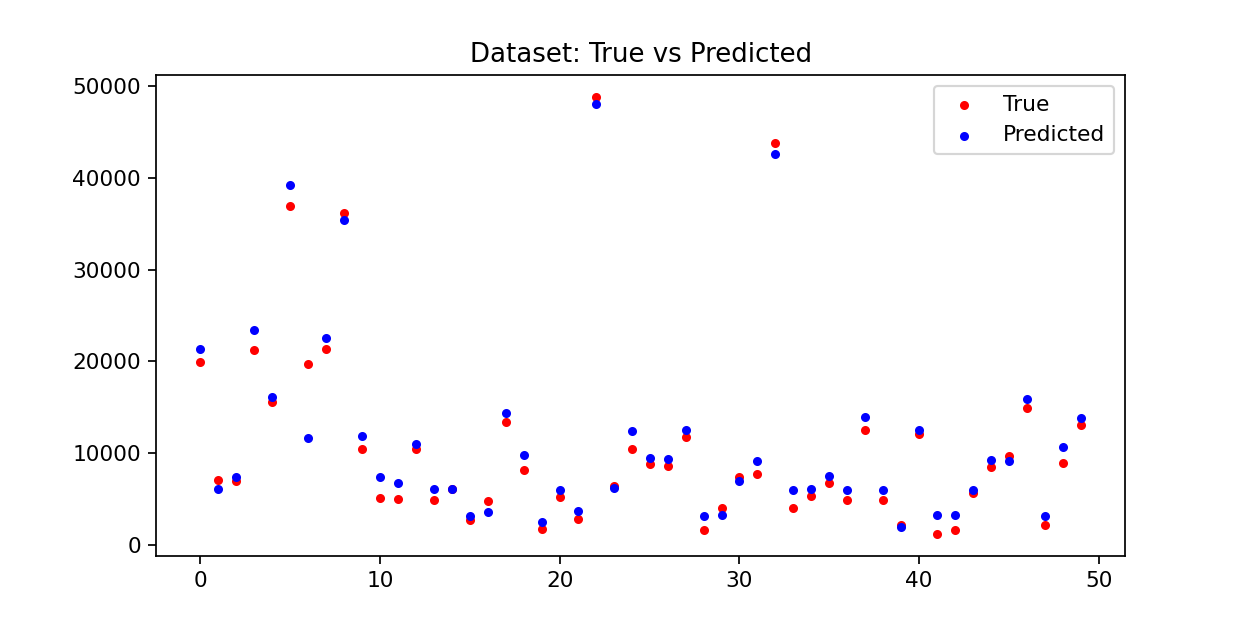

In [97]:
PlotPrediction(y[150:200],y_hat[150:200])